# THE SPARKS FOUNDATION

# TASK 2: Prediction using Unsupervised ML

# Author: Abhinav Sarpal

In [55]:
pip install termcolor

In [56]:
pip install pyfiglet

In [57]:
from termcolor import cprint 
from pyfiglet import figlet_format
text="TASK: 2"
terminal_width=20
cprint(figlet_format(text, font="standard"), "red")
cprint('In this task we will predict the optimum number of clusters and represent it visually','blue')



 _____  _    ____  _  __    ____  
|_   _|/ \  / ___|| |/ /_  |___ \ 
  | | / _ \ \___ \| ' /(_)   __) |
  | |/ ___ \ ___) | . \ _   / __/ 
  |_/_/   \_\____/|_|\_(_) |_____|
                                  

In this task we will predict the optimum number of clusters and represent it visually


# Importing all Libraries

In [14]:
import pandas as p
import numpy as n
import matplotlib.pyplot as plt
import seaborn as s
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn import datasets

# Reading data from link given

In [18]:
data =p.read_csv("Iris.csv") 

# Discovering/Analyzing the data

In [19]:
data.head() # give first 5 row command name attribute and variables

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
data.tail()  # give last 5 row command name attribute and variables

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [21]:
data.shape  #shows number of rows and columns in the dataset

(150, 6)

In [22]:
data.describe()        # Generate descriptive statistics

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [23]:
data.info() #information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [24]:
data.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


# STEP 1: Data validation and Preprocessing

In [25]:
# Converting raw data to clean dataset
df= data.dropna()  #used to remove rows and columns with Null/NaN

In [26]:
df.shape

(150, 6)

In [27]:
df.duplicated()   #Checking for duplicate values and eliminating them one by one

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [28]:
sum(df.duplicated()) 

0

In [29]:
df.isnull().sum()    #Checking for missing values

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [30]:
num=df._get_numeric_data()  #Checking for numeric data if negative values are there need to be replaced
num[num<0]=0
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [31]:
print("Sepal Length:",sorted(df['SepalLengthCm'].unique())) #Printing range or unique values of sepal Length

Sepal Length: [4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.6, 7.7, 7.9]


In [32]:
print("Sepal Width:",sorted(df['SepalWidthCm'].unique())) #Printing range or unique values of Sepal Width

Sepal Width: [2.0, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.4]


In [33]:
print("Petal Width:",sorted(df['PetalWidthCm'].unique())) #Printing range or unique values of Petal Width

Petal Width: [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5]


In [34]:
print("Petal Length:",sorted(df['PetalLengthCm'].unique())) #Printing range or unique values of Petal Length

Petal Length: [1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.9, 3.0, 3.3, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.3, 6.4, 6.6, 6.7, 6.9]


# Exploration of data and it's visual analysis

In [35]:
 p.crosstab(df.SepalLengthCm,df.SepalWidthCm) #finding relationship between different values of SepalWidthCm and SepalLengthCm among each other

SepalWidthCm,2.0,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,4.0,4.1,4.2,4.4
SepalLengthCm,,,,,,,,,,,,,,,,,,,,,,,
4.3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4.4,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0
4.5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4.6,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0
4.7,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0
4.8,0,0,0,0,0,0,0,0,0,2,1,0,0,2,0,0,0,0,0,0,0,0,0
4.9,0,0,0,1,1,0,0,0,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0
5.0,1,0,1,0,0,0,0,0,0,1,0,1,1,2,2,1,0,0,0,0,0,0,0
5.1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,2,0,1,3,0,0,0,0,0


In [36]:
 p.crosstab(df.PetalLengthCm,df.PetalWidthCm)#finding relationship between different values of PetalWidthCm and PetalLengthCm among each other

PetalWidthCm,0.1,0.2,0.3,0.4,0.5,0.6,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5
PetalLengthCm,,,,,,,,,,,,,,,,,,,,,,
1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1.1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1.2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1.3,0,4,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1.4,1,8,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1.5,4,6,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1.6,0,5,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1.7,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1.9,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


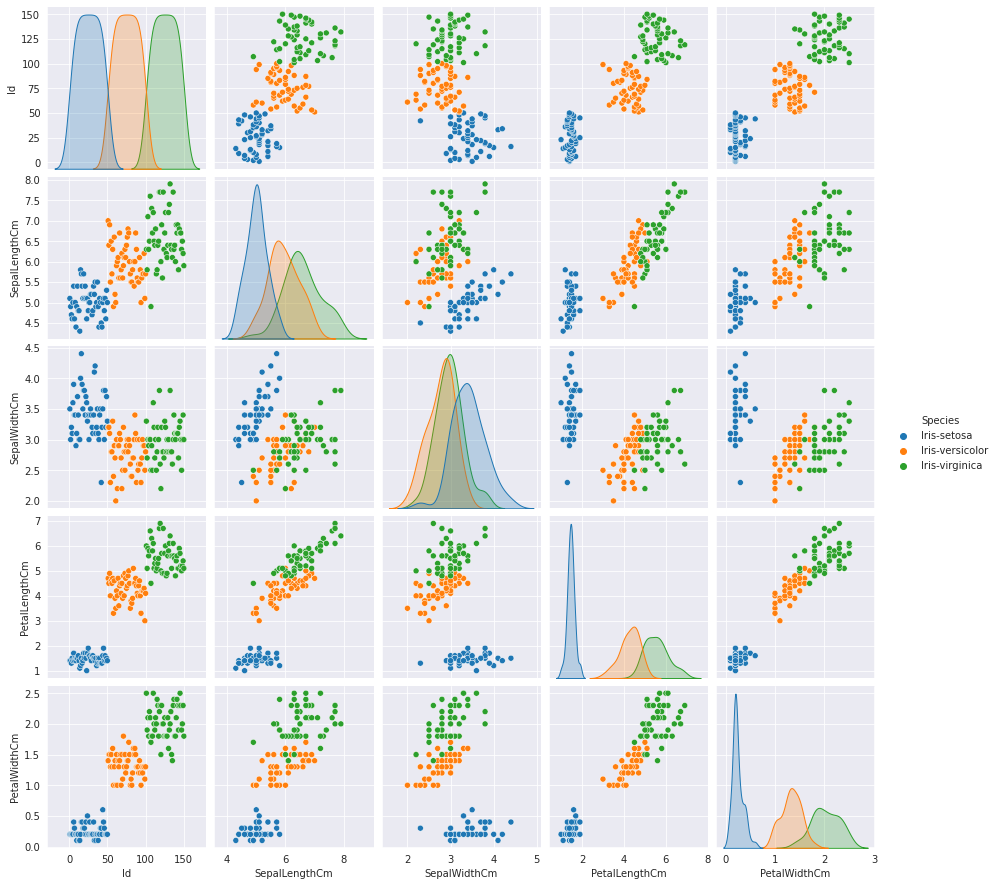

In [37]:
s.set_style('darkgrid')
s.pairplot(df,hue='Species')
plt.show()

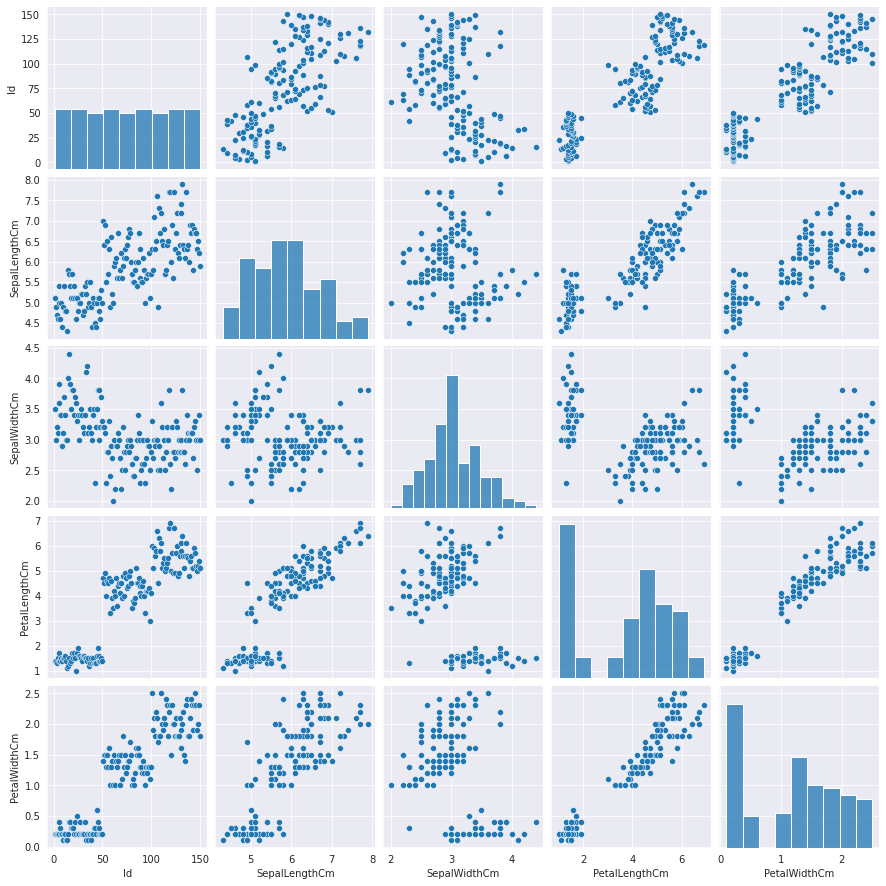

In [38]:
s.pairplot(data)


[]

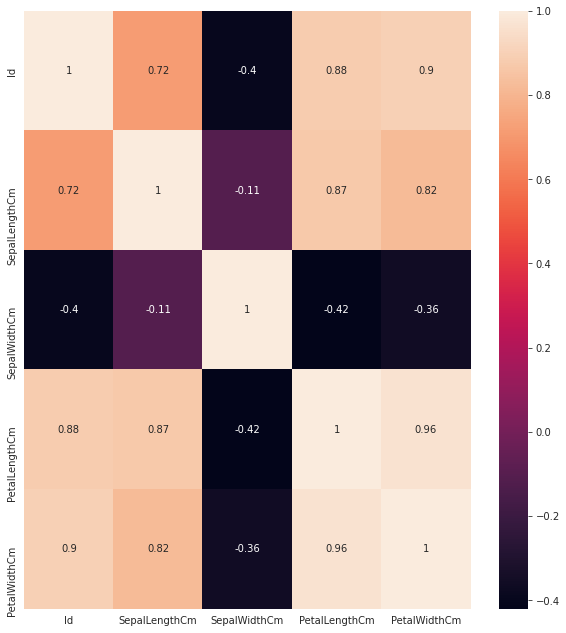

In [39]:
plt.figure(figsize=(10,11)) #corelation with each other
s.heatmap(data.corr(),annot=True)
plt.plot()

Text(0, 0.5, 'PetalLengthCm')

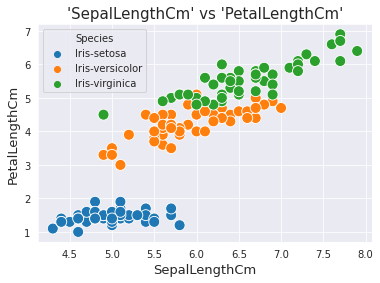

In [40]:
s.scatterplot(x='SepalLengthCm',y='PetalLengthCm',hue='Species',data=df,s=120) #data distribution based on Sepal Length and Petal Width features using scatterplot
plt.title("'SepalLengthCm' vs 'PetalLengthCm'",fontsize=15)
plt.xlabel("SepalLengthCm",fontsize=13)
plt.ylabel("PetalLengthCm",fontsize=13)

Text(0, 0.5, 'PetalWidthCm')

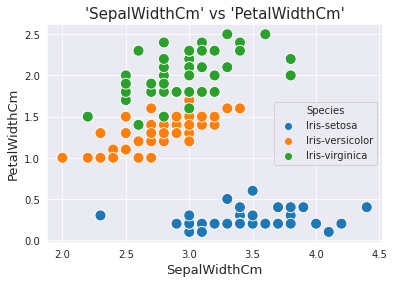

In [41]:
s.scatterplot(x='SepalWidthCm',y='PetalWidthCm',hue='Species',data=df,s=120) #data distribution based on Sepal Width and Petal Width features using scatterplot
plt.title("'SepalWidthCm' vs 'PetalWidthCm'",fontsize=15)
plt.xlabel("SepalWidthCm",fontsize=13)
plt.ylabel("PetalWidthCm",fontsize=13)

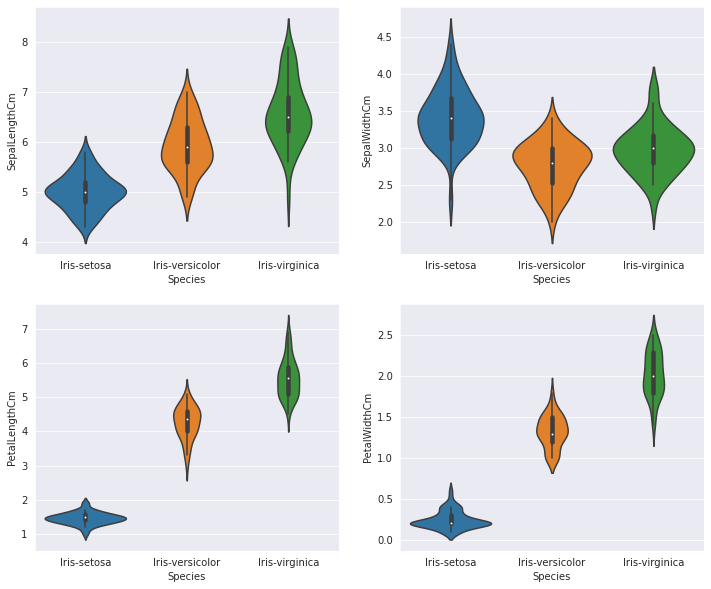

In [42]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
s.violinplot(x="Species",y="SepalLengthCm",data=data)
plt.subplot(2,2,2)
s.violinplot(x="Species",y="SepalWidthCm",data=data)
plt.subplot(2,2,3)
s.violinplot(x="Species",y="PetalLengthCm",data=data)
plt.subplot(2,2,4)
s.violinplot(x="Species",y="PetalWidthCm",data=data)

# Observation

In [43]:
# boxplot to see how the categorical feature “Species” is distributed with all other four input variables.


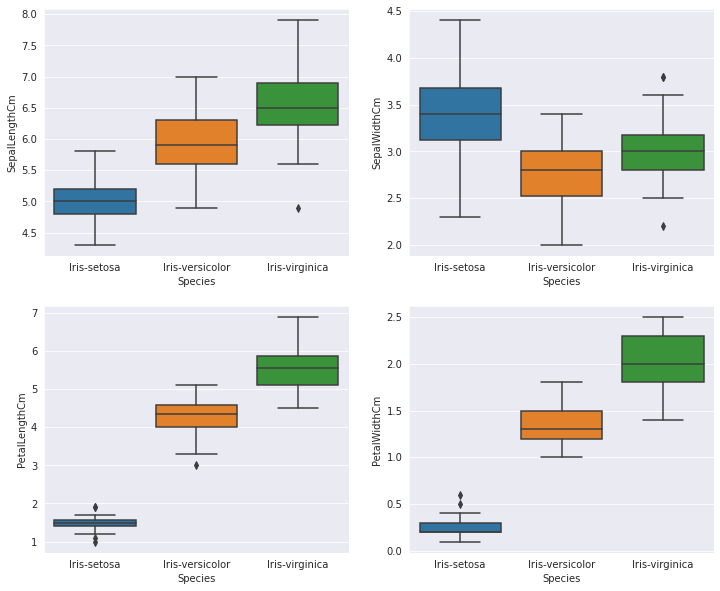

In [44]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
s.boxplot(x="Species",y="SepalLengthCm",data=data)
plt.subplot(2,2,2)
s.boxplot(x="Species",y="SepalWidthCm",data=data)
plt.subplot(2,2,3)
s.boxplot(x="Species",y="PetalLengthCm",data=data)
plt.subplot(2,2,4)
s.boxplot(x="Species",y="PetalWidthCm",data=data)


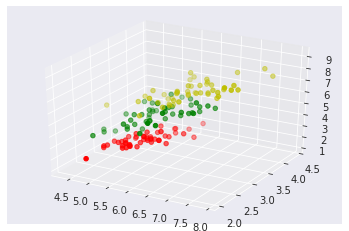

In [45]:
# 3-Dimensional Visualization
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from mpl_toolkits.mplot3d import Axes3D
iris = load_iris()
X = []
for iclass in range(3):
    X.append([[], [], []])
    for i in range(len(iris.data)):
        if iris.target[i] == iclass:
            X[iclass][0].append(iris.data[i][0])
            X[iclass][1].append(iris.data[i][1])
            X[iclass][2].append(sum(iris.data[i][2:]))

colours = ("r", "g", "y")
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for iclass in range(3):
    ax.scatter(X[iclass][0], X[iclass][1], X[iclass][2], c=colours[iclass])
plt.show()

# Preparing the data

In [46]:
from sklearn.linear_model import LinearRegression  

In [47]:
# Now we select all four features (sepal length, sepal width, petal length, and petal width) of the dataset in a variable called x so that we can train our model with these features. 
# For this, we use the iloc function on df, and the column index (0,1,2,3) for the above four columns are used, as shown below:

X= df.iloc[:,0:4].values
labels_true=df.iloc[:,4:]

# Applying Kmeans Clustering

In [48]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


# Elbow Method

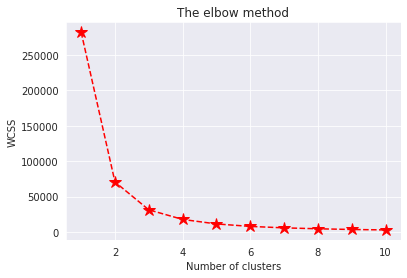

In [49]:
   
# Plotting the results onto a line graph, 
# Elbow Method
plt.plot(range(1, 11), wcss,'r--*',markersize=13)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

# Observation

In [50]:
# Applying kmeans with k=3 to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

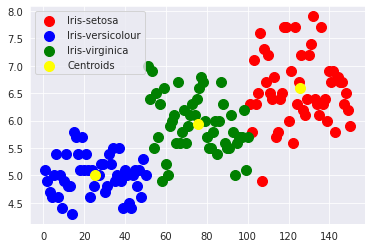

In [51]:
# Visualising the clusters - On the first two columns
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

# Evaluating the model 

In [52]:
from sklearn.cluster import KMeans
from sklearn import metrics 
from sklearn.metrics.cluster import homogeneity_score

In [53]:
k_means=KMeans(n_clusters=3,algorithm='auto',init='k-means++',random_state=5)
predicted_k_means=k_means.fit_predict(X)


Text(0, 0.5, 'PetalLengthCm')

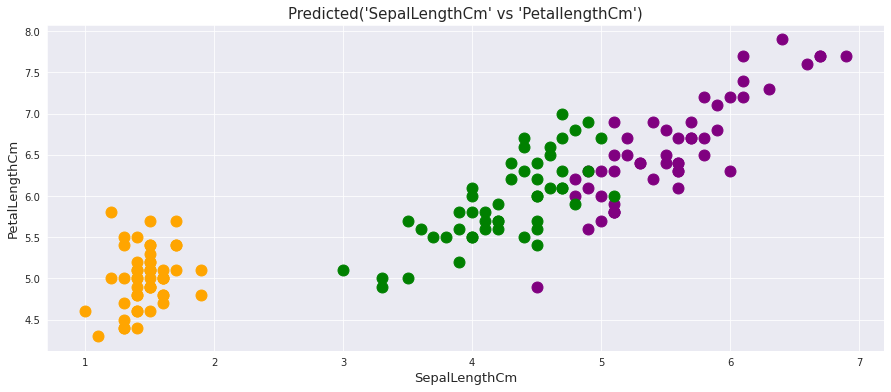

In [54]:
fig,(ax1)=plt.subplots(ncols=1,nrows=1,figsize=(15,6))
ax1.scatter(X[predicted_k_means ==0,3],X[predicted_k_means ==0,1],s= 120,c='purple',label= 'Iris-setosa')
ax1.scatter(X[predicted_k_means ==1,3],X[predicted_k_means ==1,1],s= 120,c='orange',label= 'Iris-versicolour')
ax1.scatter(X[predicted_k_means ==2,3],X[predicted_k_means ==2,1],s= 120,c='green',label= 'Iris-virginica')

ax1.set_title("Predicted('SepalLengthCm' vs 'PetallengthCm')",fontsize=15)
ax1.set_xlabel("SepalLengthCm",fontsize=13)
ax1.set_ylabel("PetalLengthCm",fontsize=13)
